# Projeto

## Classification

## KNN Approach

In [1]:
import dslabs_functions as dslabs
import numpy as np
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from matplotlib.pyplot import figure, savefig, show
import dslabs_functions as dslabs

file_tag = "Credit_Score"
## Train - resultado do balancing escolhido (over no nosso caso)
train_filename = "data_preparation_final_results_1/data_preparation_csvs/balancing_csvs/data_balancing_alt2_over.csv"
## ficheiro Teste ao qual nao fazemos balancing
test_filename = "data_preparation_final_results_1/data_preparation_csvs/feat_eng_csvs/test_data_feat_select_alt3_RFE.csv"
target = "Credit_Score"
# default
eval_metric = "accuracy"

trnX, tstX, trnY, tstY, labels, vars = dslabs.read_train_test_from_files(
    train_filename, test_filename, target
)
print(f"Train#={len(trnX)} Test#={len(tstX)}")
print(f"Labels={labels}")

Train#=113752 Test#=20000
Labels=[0.0, 1.0]


### Parameters Study

  File "c:\Users\franc\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


KNN best with k=2 and manhattan


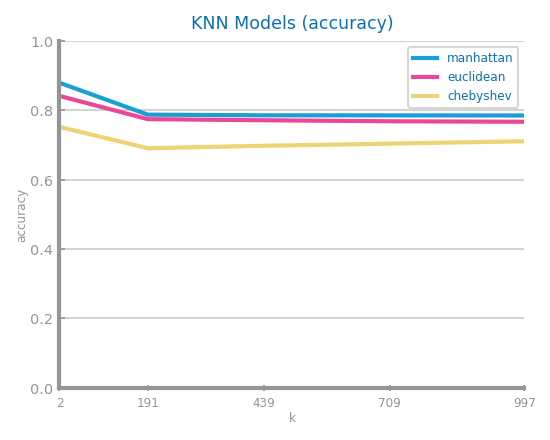

In [2]:
#CLASS_EVAL_METRICS = ["accuracy", "recall", "precision", "auc", "f1"]
eval_metric = "accuracy"
figure()
best_model, params = dslabs.knn_study(trnX, trnY, tstX, tstY, k_max=25, metric=eval_metric)
savefig(f'classification_images/knn/{file_tag}_knn_{eval_metric}_study.png')
show()

### Best model performance


<Figure size 600x450 with 0 Axes>

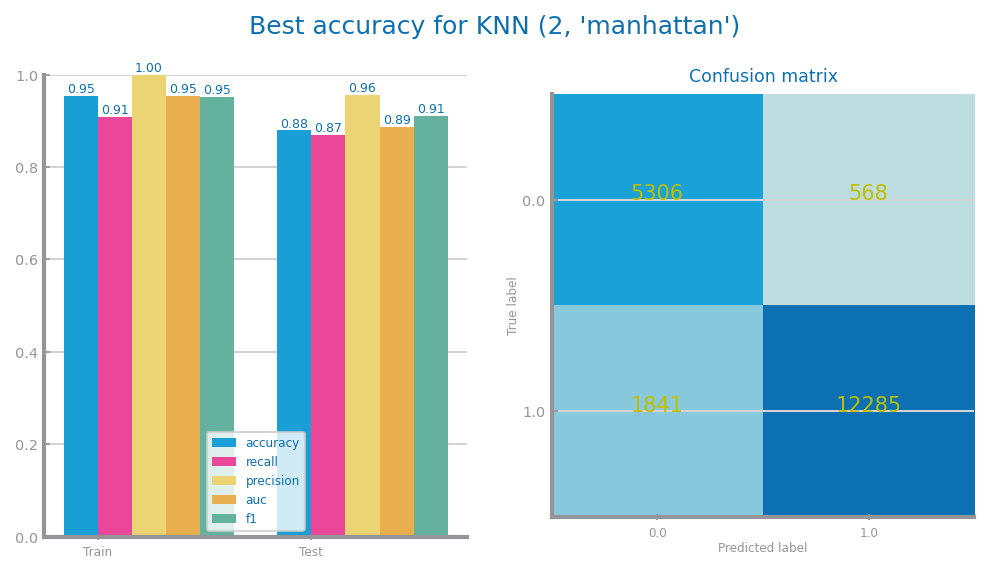

In [3]:
prd_trn: np.array = best_model.predict(trnX)
prd_tst: np.array = best_model.predict(tstX)
figure()
dslabs.plot_evaluation_results(params, trnY, prd_trn, tstY, prd_tst, labels)
savefig(f'classification_images/knn/{file_tag}_knn_{params["name"]}_best_{params["metric"]}_eval.png')
show()

### Overfitting study


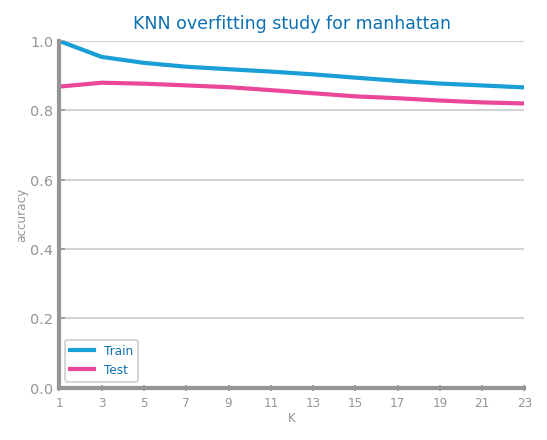

In [4]:
from typing import Literal
from sklearn.neighbors import KNeighborsClassifier


distance: Literal["manhattan", "euclidean", "chebyshev"] = params["params"][1]
K_MAX = 25
kvalues: list[int] = [i for i in range(1, K_MAX, 2)]
y_tst_values: list = []
y_trn_values: list = []
acc_metric: str = "accuracy"
for k in kvalues:
    clf = KNeighborsClassifier(n_neighbors=k, metric=distance)
    clf.fit(trnX, trnY)
    prd_tst_Y: np.array = clf.predict(tstX)
    prd_trn_Y: np.array = clf.predict(trnX)
    y_tst_values.append(dslabs.CLASS_EVAL_METRICS[acc_metric](tstY, prd_tst_Y))
    y_trn_values.append(dslabs.CLASS_EVAL_METRICS[acc_metric](trnY, prd_trn_Y))

figure()
dslabs.plot_multiline_chart(
    kvalues,
    {"Train": y_trn_values, "Test": y_tst_values},
    title=f"KNN overfitting study for {distance}",
    xlabel="K",
    ylabel=str(eval_metric),
    percentage=True,
)
savefig(f"classification_images/knn/{file_tag}_knn_overfitting.png")
show()